In [1]:
%run import_libs.py

In [ ]:
from matplotlib_venn import venn2

from itertools import cycle

In [24]:
import matplotlib.pylab as plt

In [ ]:
'''
import os
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib_venn import venn2
import seaborn as sns

from tqdm import tqdm
from itertools import cycle

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection

import lightgbm as lgb
import xgboost as xgb
import catboost as cat

import optbinning

pd.set_option("display.max_columns", None)

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
'''

### get data

In [2]:
df_train = get_train_data(TRAIN_PATH='./data/train.parquet')
num_features = pd.read_csv("num_feats_after_filtering.csv")["0"].to_list()

df_train_agg = get_df_w_aggrs(df=df_train, feats=num_features)
df_train_target = get_target(TARGET_PATH='./data/train_labels.csv')
df_train = get_train_data_with_target_merged(df_train=df_train_agg, df_train_target=df_train_target)

(458913, 151)
(458913, 151)
(458913, 151)
(458913, 162)
(458913, 616)


In [3]:
df_test = get_test_data(TEST_PATH='./data/test.parquet')
df_test = get_df_w_aggrs(df=df_test, feats=num_features)

(924621, 151)
(924621, 151)
(924621, 151)
(924621, 162)
(924621, 616)


In [6]:
df_train.target.value_counts()

target
0    340085
1    118828
Name: count, dtype: int64

In [8]:
340085 / (340085 + 118828)

0.7410663894899469

In [9]:
df_train.head(3)

customer_ID   P_2_min   P_3_min  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.868580  0.581678   
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...  0.861109  0.510142   
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...  0.797670  0.381123   

   P_4_min  D_39_min  D_41_min  D_42_min  D_43_min  D_44_min  D_45_min  ...  \
0      0.0         0       0.0       NaN       NaN         0  0.708906  ...   
1      0.0         0       0.0       NaN  0.060646         0  0.239459  ...   
2      0.0         0       0.0       NaN       NaN         0  0.222406  ...   

   D_114_last  D_116_last  D_117_last  D_120_last  D_126_last  D_63_last  \
0           1           0           5           0           2          0   
1           1           0           0           0           2          3   
2           1           0           0           0           2          3   

   D_64_last  D_66_last  D_68_last  target  
0          0         -1          6       0  
1          0         -1          6       0  
2          2         -1          6       0  

[3 rows x 617 columns]

In [4]:
cat_features = [f"{f}_last" for f in ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
cat_features

['B_30_last',
 'B_38_last',
 'D_114_last',
 'D_116_last',
 'D_117_last',
 'D_120_last',
 'D_126_last',
 'D_63_last',
 'D_64_last',
 'D_66_last',
 'D_68_last']

In [6]:
payment_feats = []
delinq_feats = []
spend_feats = []
balance_feats = []
risk_feats = []

for feat in list(df_train):
    if feat in cat_features:
        continue
    
    if feat[0] == 'P':
        #print(feat)
        payment_feats.append(feat)
    elif feat[0] == 'D':
        delinq_feats.append(feat)
    elif feat[0] == 'S':
        spend_feats.append(feat)
    elif feat[0] == 'B':
        balance_feats.append(feat)
    elif feat[0] == 'R':
        risk_feats.append(feat)

In [7]:
num_features = payment_feats + delinq_feats + spend_feats + balance_feats + risk_feats
len(num_features)

604

### Target Distribution

In [ ]:
# from itertools import cycle
# pd.set_option("display.max_columns", None)

# plt.style.use("ggplot")
# color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df_train_target.target)
plt.show()

In [ ]:
df_train_target.target.value_counts()

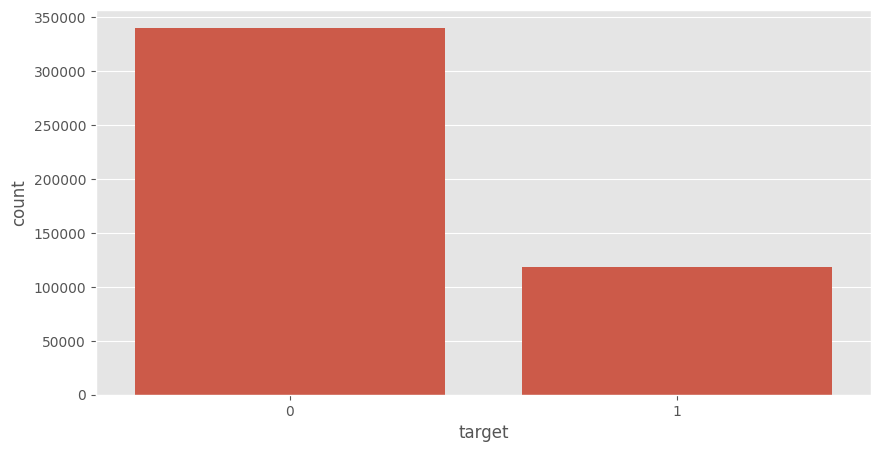

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df_train_target.target)
plt.show()

### EDA

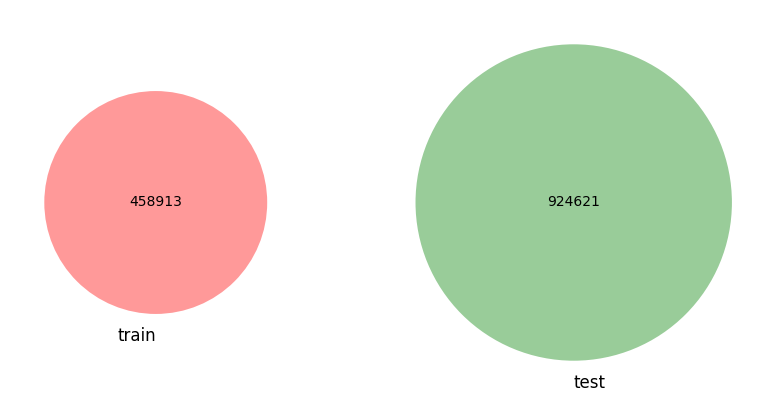

In [9]:
# number of unique cutomers

fig, ax = plt.subplots(figsize=(10,5))
set1 = set(df_train.customer_ID.unique())
set2 = set(df_test.customer_ID.unique())

venn2([set1, set2], ('train', 'test'))
plt.show()

we can observe that non of the user intersect in train test data

In [12]:
df_train_tmp = get_train_data(TRAIN_PATH='./data/train.parquet')
df_test_tmp = get_test_data(TEST_PATH='./data/test.parquet')

In [13]:
# s_2 date featue
df_train_tmp['S_2'] = pd.to_datetime(df_train_tmp['S_2'])
df_test_tmp['S_2'] = pd.to_datetime(df_test_tmp['S_2'])

In [14]:
df_train_tmp['S_2'].min(), df_train_tmp['S_2'].max()

(Timestamp('2017-03-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [15]:
df_test_tmp['S_2'].min(), df_test_tmp['S_2'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-10-31 00:00:00'))

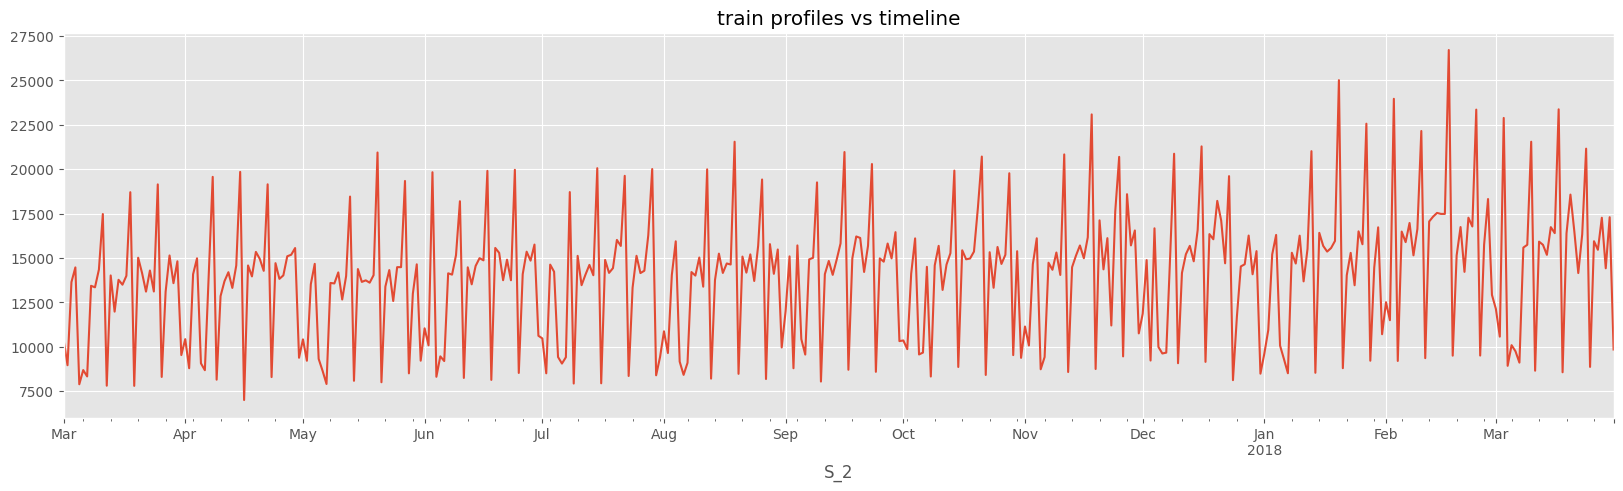

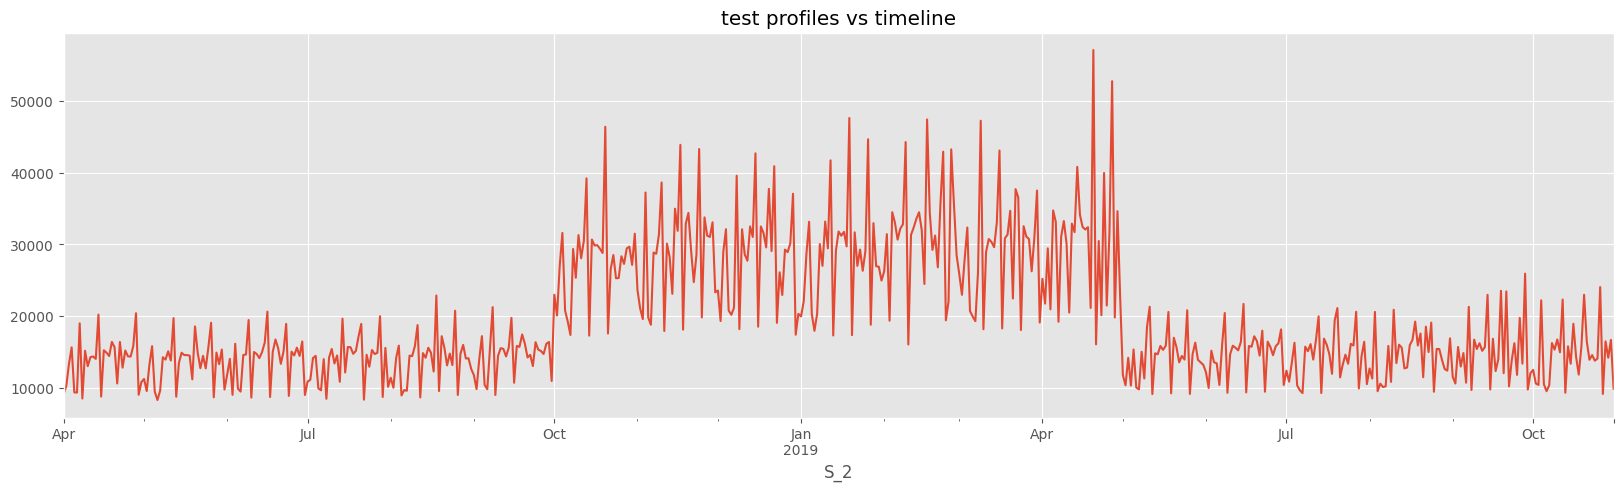

In [16]:
# checking user profiles number of user profiles vs timeline

fig, ax = plt.subplots(figsize=(20,5))
df_train_tmp.groupby("S_2")['customer_ID'].count().plot()
plt.title("train profiles vs timeline")
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
df_test_tmp.groupby("S_2")['customer_ID'].count().plot()
plt.title("test profiles vs timeline")
plt.show()

we can observe that train profiles are consistence  
but test profiles increased between oct to apr

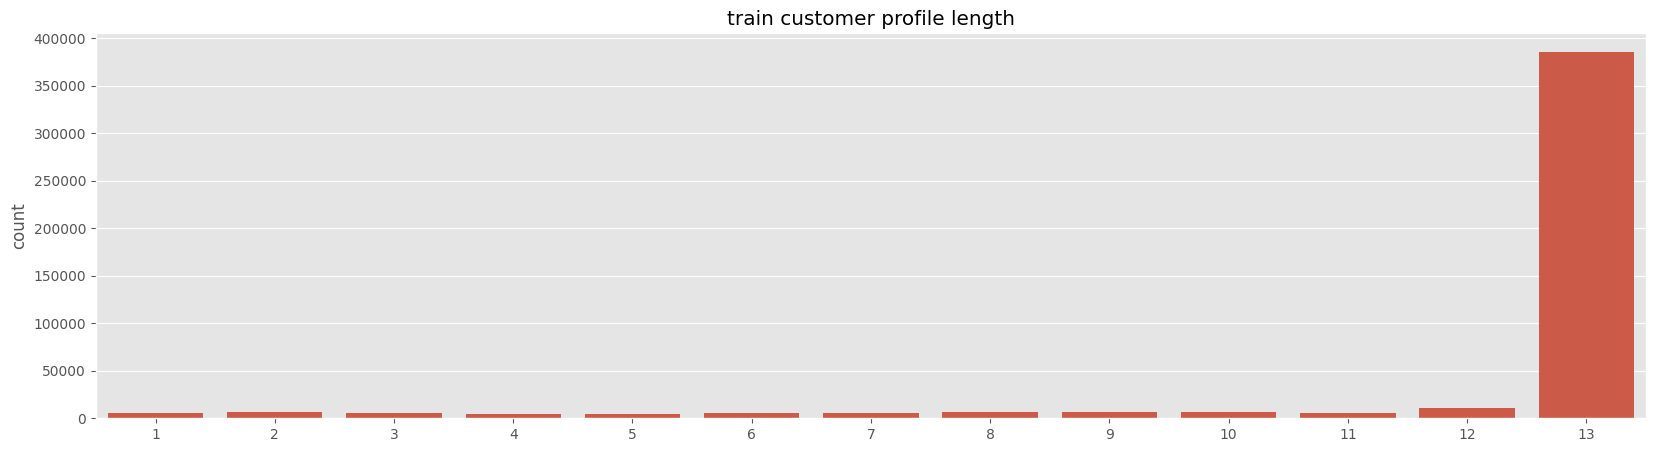

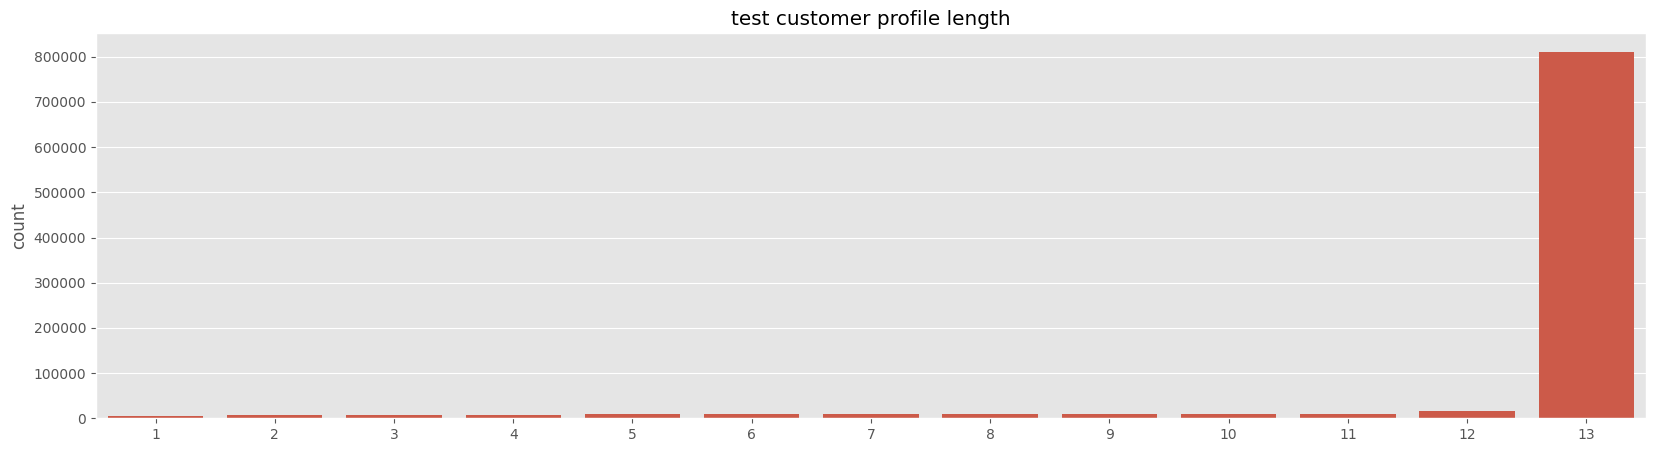

In [17]:
# check each customer profile length

fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x=df_train_tmp.groupby("customer_ID")['customer_ID'].count().values)
plt.title("train customer profile length")
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x=df_test_tmp.groupby("customer_ID")['customer_ID'].count().values)
plt.title("test customer profile length")
plt.show()

we can observe that train and test profile lengths are similar distributions

### Information Value (IV)

In [19]:
import optbinning

In [20]:
iv_score_dict = {}
for col in tqdm(num_features + cat_features):
    if col in cat_features:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(df_train[col], df_train['target'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(df_train[col], df_train['target'])
    binning_table = optb.binning_table
    binning_table.build()
    iv_score_dict[col] = binning_table.iv

iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

  0%|          | 0/615 [00:00<?, ?it/s]c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packa

In [21]:
# top 10 imp iv features
iv_score_df.head(10)

P_2_last     3.733865
P_2_min      3.403801
P_2_avg      3.296180
P_2_max      2.769612
D_48_last    2.407059
D_48_avg     2.258525
B_18_last    2.213057
B_7_last     2.106943
D_61_last    2.070676
D_61_avg     2.052971
dtype: float64

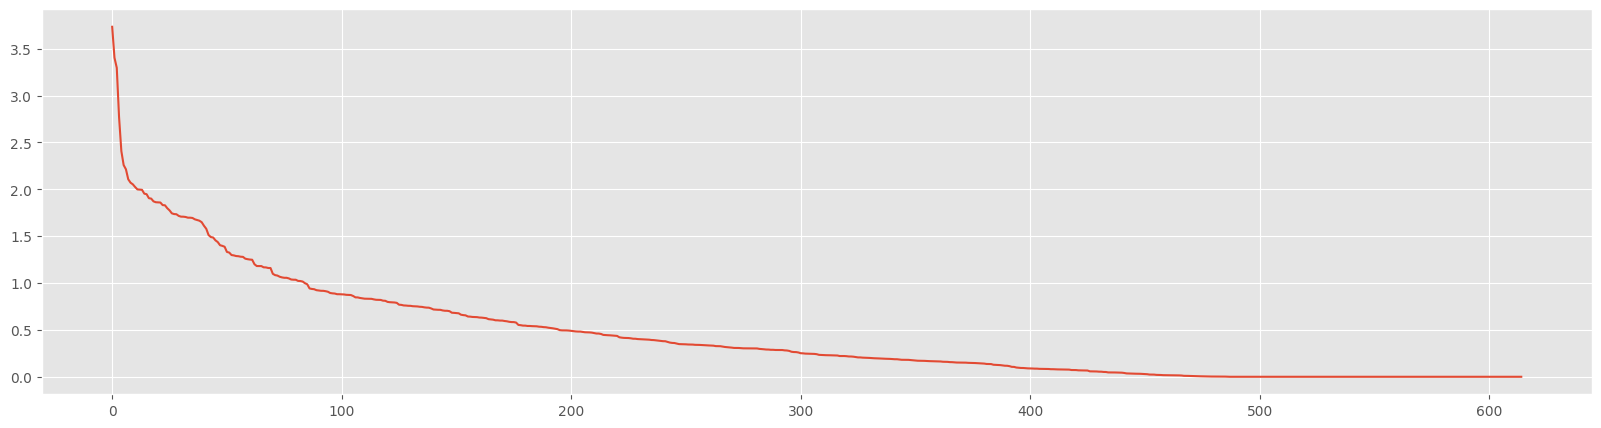

In [22]:
# iv score vs features
fig, ax = plt.subplots(figsize=(20,5))
iv_score_df.reset_index(drop=True).plot()
plt.show()

### Weight of Evidence (WOE)

In [23]:
col = 'P_2_last'
optb = optbinning.OptimalBinning(dtype='numerical')
optb.fit(df_train[col], df_train['target'])
binning_table = optb.binning_table
display(binning_table.build())

c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.18)   29761   0.064851       2635   27126    0.911461   
1       [0.18, 0.32)   33941   0.073960       8492   25449    0.749801   
2       [0.32, 0.43)   40367   0.087962      15641   24726    0.612530   
3       [0.43, 0.52)   41489   0.090407      22468   19021    0.458459   
4       [0.52, 0.58)   28618   0.062360      19692    8926    0.311902   
5       [0.58, 0.64)   32511   0.070843      26165    6346    0.195195   
6       [0.64, 0.69)   22947   0.050003      20375    2572    0.112084   
7       [0.69, 0.73)   23741   0.051733      22115    1626    0.068489   
8       [0.73, 0.77)   25509   0.055586      24539     970    0.038026   
9       [0.77, 0.82)   32836   0.071552      32119     717    0.021836   
10      [0.82, 0.85)   23509   0.051228      23259     250    0.010634   
11      [0.85, 0.88)   26153   0.056989      25940     213    0.008144   
12      [0.88, 0.93)   39940   0.087032      39722     218    0.005458   
13      [0.93, 0.97)   29816   0.064971      29704     112    0.003756   
14       [0.97, inf)   24806   0.054054      24745      61    0.002459   
15           Special       0   0.000000          0       0    0.000000   
16           Missing    2969   0.006470       2474     495    0.166723   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0      -3.383128  0.746086  0.064756  
1       -2.14907  0.406597  0.042861  
2      -1.509478  0.244673  0.027976  
3       -0.88497  0.083192  0.010072  
4      -0.260274  0.004480  0.000558  
5       0.365079  0.008591  0.001068  
6       1.018106  0.038960  0.004670  
7       1.558615  0.080026  0.009100  
8       2.179204  0.139453  0.014638  
9       2.750609  0.243182  0.023413  
10      3.481468  0.230779  0.019702  
11      3.750731  0.279364  0.022788  
12      4.153647  0.477527  0.036381  
13       4.52902  0.391309  0.027989  
14      4.953986  0.357915  0.023866  
15           0.0  0.000000  0.000000  
16      0.557515  0.001733  0.000214  
Totals            3.733865  0.330051

P_2 is a continuous feature, os we splited into 15 bins  
each bin have non-event and event counts and rates  
each bin have WOE and IV values  
for missing values it's created 16th bin

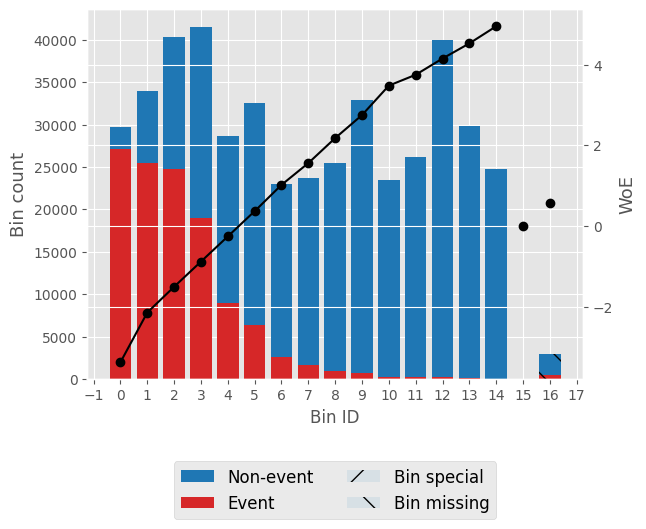

None

In [24]:
display(binning_table.plot(metric="woe"))

from this woe plot we can observe that while increasing bins the event rate decrease  
you can observe that black doted line that is positively correlated with target

----------------------------------------------------------------------------------------------------
################ Feature Name :  P_2_last





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.18)   29761   0.064851       2635   27126    0.911461   
1       [0.18, 0.32)   33941   0.073960       8492   25449    0.749801   
2       [0.32, 0.43)   40367   0.087962      15641   24726    0.612530   
3       [0.43, 0.52)   41489   0.090407      22468   19021    0.458459   
4       [0.52, 0.58)   28618   0.062360      19692    8926    0.311902   
5       [0.58, 0.64)   32511   0.070843      26165    6346    0.195195   
6       [0.64, 0.69)   22947   0.050003      20375    2572    0.112084   
7       [0.69, 0.73)   23741   0.051733      22115    1626    0.068489   
8       [0.73, 0.77)   25509   0.055586      24539     970    0.038026   
9       [0.77, 0.82)   32836   0.071552      32119     717    0.021836   
10      [0.82, 0.85)   23509   0.051228      23259     250    0.010634   
11      [0.85, 0.88)   26153   0.056989      25940     213    0.008144   
12      [0.88, 0.93)   39940   0.087032      39722     218    0.005458   
13      [0.93, 0.97)   29816   0.064971      29704     112    0.003756   
14       [0.97, inf)   24806   0.054054      24745      61    0.002459   
15           Special       0   0.000000          0       0    0.000000   
16           Missing    2969   0.006470       2474     495    0.166723   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0      -3.383128  0.746086  0.064756  
1       -2.14907  0.406597  0.042861  
2      -1.509478  0.244673  0.027976  
3       -0.88497  0.083192  0.010072  
4      -0.260274  0.004480  0.000558  
5       0.365079  0.008591  0.001068  
6       1.018106  0.038960  0.004670  
7       1.558615  0.080026  0.009100  
8       2.179204  0.139453  0.014638  
9       2.750609  0.243182  0.023413  
10      3.481468  0.230779  0.019702  
11      3.750731  0.279364  0.022788  
12      4.153647  0.477527  0.036381  
13       4.52902  0.391309  0.027989  
14      4.953986  0.357915  0.023866  
15           0.0  0.000000  0.000000  
16      0.557515  0.001733  0.000214  
Totals            3.733865  0.330051

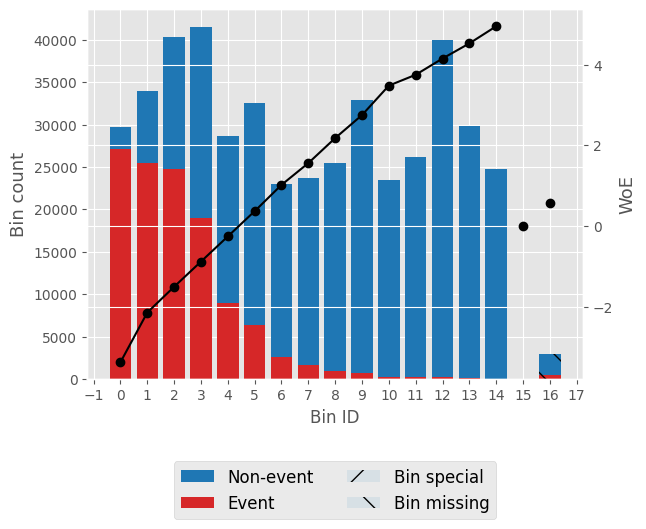

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  P_2_min





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.10)   26969   0.058767       3161   23808    0.882791   
1       [0.10, 0.27)   39067   0.085129      11037   28030    0.717485   
2       [0.27, 0.33)   23308   0.050790       9201   14107    0.605243   
3       [0.33, 0.38)   24329   0.053014      11402   12927    0.531341   
4       [0.38, 0.43)   23364   0.050912      12812   10552    0.451635   
5       [0.43, 0.47)   23055   0.050238      14338    8717    0.378096   
6       [0.47, 0.52)   26338   0.057392      18789    7549    0.286620   
7       [0.52, 0.59)   35916   0.078263      29332    6584    0.183317   
8       [0.59, 0.67)   43087   0.093889      39326    3761    0.087289   
9       [0.67, 0.74)   40373   0.087975      39081    1292    0.032002   
10      [0.74, 0.78)   23151   0.050447      22782     369    0.015939   
11      [0.78, 0.81)   22991   0.050099      22732     259    0.011265   
12      [0.81, 0.84)   24378   0.053121      24214     164    0.006727   
13      [0.84, 0.88)   31400   0.068423      31239     161    0.005127   
14      [0.88, 0.92)   24890   0.054237      24811      79    0.003174   
15       [0.92, inf)   23863   0.051999      23804      59    0.002472   
16           Special       0   0.000000          0       0    0.000000   
17           Missing    2434   0.005304       2024     410    0.168447   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0      -3.070652  0.586685  0.053636  
1      -1.983541  0.403519  0.043518  
2      -1.478877  0.135558  0.015552  
3      -1.177048  0.088585  0.010475  
4      -0.857452  0.043840  0.005318  
5       -0.55388  0.017280  0.002133  
6      -0.139662  0.001157  0.000144  
7       0.442518  0.013648  0.001692  
8       1.295682  0.108818  0.012724  
9       2.357926  0.245325  0.025090  
10      3.071411  0.196213  0.017936  
11      3.423182  0.221351  0.019083  
12      3.943301  0.275320  0.021736  
13        4.2165  0.381600  0.028766  
14      4.698076  0.339626  0.023619  
15      4.948553  0.343913  0.022953  
16           0.0  0.000000  0.000000  
17      0.545155  0.001363  0.000168  
Totals            3.403801  0.304544

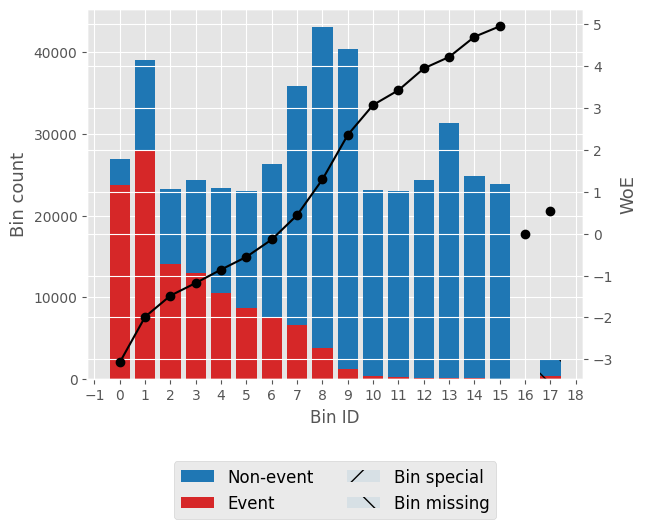

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  P_2_avg





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.29)   34442   0.075051       6304   28138    0.816968   
1       [0.29, 0.35)   23317   0.050809       6756   16561    0.710254   
2       [0.35, 0.41)   27376   0.059654       9744   17632    0.644068   
3       [0.41, 0.48)   33755   0.073554      15104   18651    0.552540   
4       [0.48, 0.55)   38897   0.084759      22262   16635    0.427668   
5       [0.55, 0.61)   32512   0.070846      23277    9235    0.284049   
6       [0.61, 0.67)   31776   0.069242      26272    5504    0.173212   
7       [0.67, 0.75)   44950   0.097949      41347    3603    0.080156   
8       [0.75, 0.80)   35809   0.078030      34557    1252    0.034963   
9       [0.80, 0.86)   44744   0.097500      44056     688    0.015376   
10      [0.86, 0.90)   33542   0.073090      33302     240    0.007155   
11      [0.90, 0.93)   25290   0.055108      25169     121    0.004784   
12      [0.93, 0.96)   26474   0.057688      26368     106    0.004004   
13       [0.96, inf)   23595   0.051415      23543      52    0.002204   
14           Special       0   0.000000          0       0    0.000000   
15           Missing    2434   0.005304       2024     410    0.168447   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0      -2.547455  0.556006  0.055259  
1      -1.948138  0.232810  0.025227  
2      -1.644582  0.196907  0.022168  
3      -1.262459  0.142084  0.016668  
4      -0.760146  0.056655  0.006916  
5      -0.127053  0.001178  0.000147  
6        0.51151  0.015822  0.001956  
7       1.388715  0.126730  0.014680  
8       2.266349  0.206411  0.021396  
9       3.107909  0.384617  0.034947  
10      3.881215  0.372220  0.029698  
11      4.286059  0.312838  0.023307  
12      4.464949  0.342200  0.024740  
13      5.063822  0.348336  0.022816  
14           0.0  0.000000  0.000000  
15      0.545155  0.001363  0.000168  
Totals            3.296180  0.300094

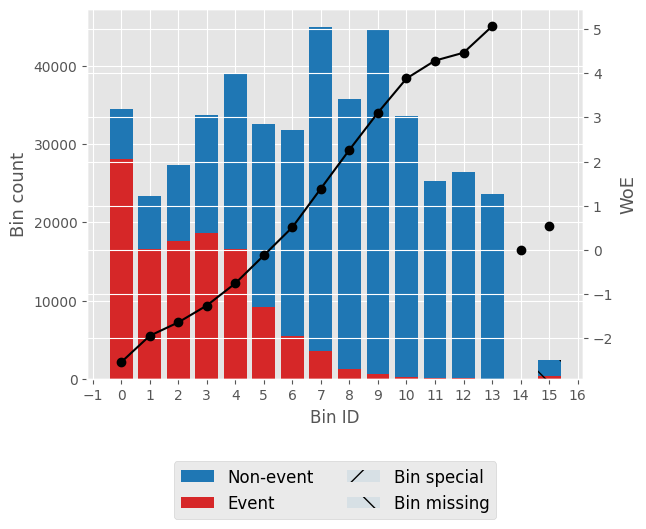

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  P_2_max





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.34)   23246   0.050654       5191   18055    0.776693   
1       [0.34, 0.42)   23786   0.051831       7130   16656    0.700244   
2       [0.42, 0.47)   26483   0.057708       9236   17247    0.651248   
3       [0.47, 0.53)   28806   0.062770      11904   16902    0.586753   
4       [0.53, 0.58)   29210   0.063650      14528   14682    0.502636   
5       [0.58, 0.64)   34796   0.075823      21219   13577    0.390189   
6       [0.64, 0.70)   35693   0.077777      26321    9372    0.262572   
7       [0.70, 0.76)   31903   0.069519      26696    5207    0.163213   
8       [0.76, 0.80)   23767   0.051790      21520    2247    0.094543   
9       [0.80, 0.85)   34458   0.075086      32398    2060    0.059783   
10      [0.85, 0.90)   44884   0.097805      43582    1302    0.029008   
11      [0.90, 0.93)   29020   0.063236      28573     447    0.015403   
12      [0.93, 0.96)   31984   0.069695      31641     343    0.010724   
13      [0.96, 1.00)   32041   0.069819      31820     221    0.006897   
14       [1.00, inf)   26402   0.057532      26302     100    0.003788   
15           Special       0   0.000000          0       0    0.000000   
16           Missing    2434   0.005304       2024     410    0.168447   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0      -2.298015  0.314089  0.032408  
1      -1.899978  0.226484  0.024698  
2      -1.676048  0.197748  0.022179  
3      -1.402076  0.150353  0.017392  
4      -1.062063  0.085855  0.010254  
5      -0.604999  0.031378  0.003863  
6      -0.018878  0.000028  0.000003  
7       0.582991  0.020217  0.002492  
8       1.207868  0.053591  0.006319  
9       1.703872  0.132780  0.014842  
10      2.459224  0.288205  0.029032  
11       3.10614  0.249285  0.022657  
12       3.47296  0.313094  0.026767  
13      3.918169  0.359316  0.028489  
14      4.520712  0.345825  0.024770  
15           0.0  0.000000  0.000000  
16      0.545155  0.001363  0.000168  
Totals            2.769612  0.266335

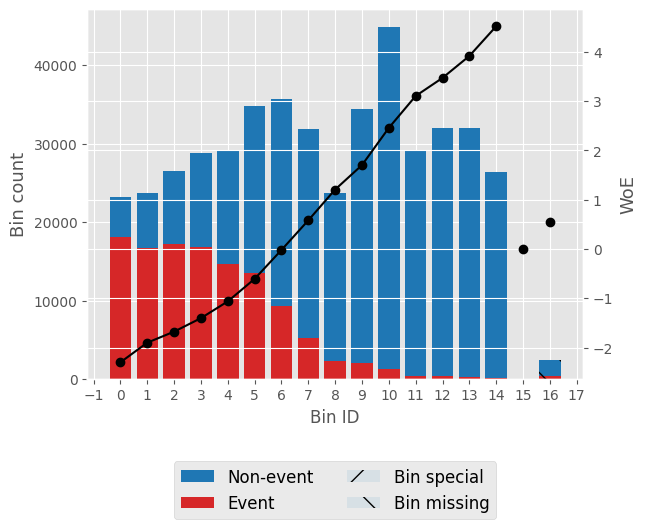

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  D_48_last





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.03)   40336   0.087895      39758     578    0.014330   
1       [0.03, 0.06)   39884   0.086910      39179     705    0.017676   
2       [0.06, 0.11)   36504   0.079544      35573     931    0.025504   
3       [0.11, 0.17)   36186   0.078852      34541    1645    0.045460   
4       [0.17, 0.28)   38181   0.083199      34570    3611    0.094576   
5       [0.28, 0.44)   40515   0.088285      32512    8003    0.197532   
6       [0.44, 0.54)   23901   0.052082      16300    7601    0.318020   
7       [0.54, 0.69)   35352   0.077034      20167   15185    0.429537   
8       [0.69, 0.84)   37037   0.080706      16254   20783    0.561142   
9       [0.84, 0.91)   27111   0.059077       9269   17842    0.658109   
10      [0.91, 0.95)   22967   0.050047       6257   16710    0.727566   
11       [0.95, inf)   22947   0.050003       3674   19273    0.839892   
12           Special       0   0.000000          0       0    0.000000   
13           Missing   57992   0.126368      52031    5961    0.102790   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0       3.179474  0.356234  0.031988  
1        2.96618  0.324116  0.030142  
2       2.591564  0.250774  0.024754  
3       1.992888  0.174821  0.018830  
4       1.207483  0.086048  0.010147  
5       0.350274  0.009895  0.001231  
6      -0.288633  0.004629  0.000577  
7      -0.767779  0.052585  0.006416  
8      -1.297315  0.164896  0.019278  
9      -1.706398  0.209708  0.023434  
10     -2.033825  0.248584  0.026627  
11     -2.708943  0.410105  0.039745  
12           0.0  0.000000  0.000000  
13      1.115083  0.114663  0.013634  
Totals            2.407059  0.246803

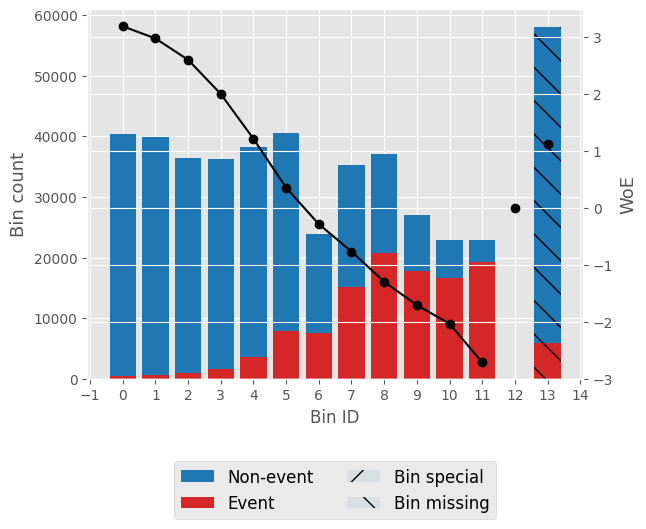

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  D_48_avg





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.03)   35195   0.076692      34731     464    0.013184   
1       [0.03, 0.06)   39000   0.084983      38396     604    0.015487   
2       [0.06, 0.11)   45855   0.099921      44890     965    0.021045   
3       [0.11, 0.16)   39449   0.085962      37915    1534    0.038886   
4       [0.16, 0.25)   43564   0.094929      39887    3677    0.084405   
5       [0.25, 0.33)   28017   0.061051      23353    4664    0.166470   
6       [0.33, 0.44)   34633   0.075467      25247    9386    0.271013   
7       [0.44, 0.55)   31142   0.067860      19156   11986    0.384882   
8       [0.55, 0.68)   37493   0.081700      18810   18683    0.498306   
9       [0.68, 0.75)   23327   0.050831       9725   13602    0.583101   
10      [0.75, 0.86)   34236   0.074602      12389   21847    0.638129   
11       [0.86, inf)   38186   0.083210      10799   27387    0.717200   
12           Special       0   0.000000          0       0    0.000000   
13           Missing   28816   0.062792      24787    4029    0.139818   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0       3.263985  0.320588  0.028385  
1       3.100616  0.334303  0.030412  
2       2.788324  0.345405  0.033056  
3        2.15595  0.212528  0.022382  
4       1.332435  0.115044  0.013403  
5       0.559333  0.016455  0.002030  
6       -0.06203  0.000295  0.000037  
7      -0.582642  0.025952  0.003199  
8      -1.044744  0.106478  0.012736  
9      -1.387035  0.119108  0.013799  
10     -1.618773  0.238647  0.026949  
11     -1.982133  0.393894  0.042488  
12           0.0  0.000000  0.000000  
13      0.765283  0.029830  0.003640  
Totals            2.258525  0.232516

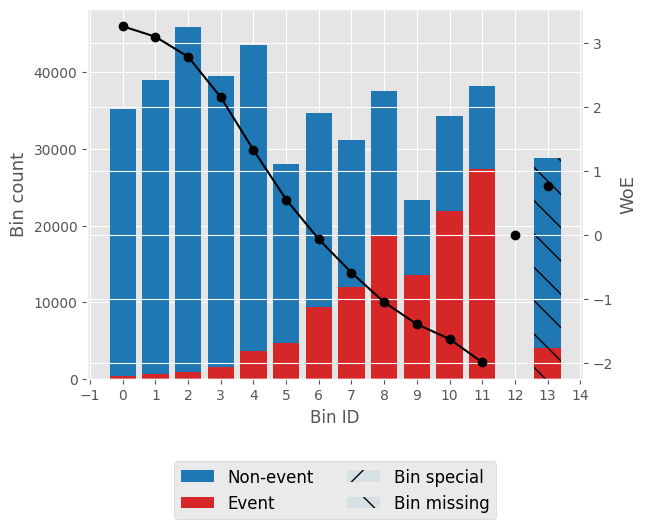

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  B_18_last





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.07)   35756   0.077915      13232   22524    0.629936   
1       [0.07, 0.19)   72676   0.158366      28915   43761    0.602138   
2       [0.19, 0.24)   40041   0.087252      18839   21202    0.529507   
3       [0.24, 0.33)   22997   0.050112      13649    9348    0.406488   
4       [0.33, 0.53)   27266   0.059414      20426    6840    0.250862   
5       [0.53, 0.59)   33965   0.074012      28605    5360    0.157810   
6       [0.59, 0.65)   33574   0.073160      29760    3814    0.113600   
7       [0.65, 0.85)   28493   0.062088      25948    2545    0.089320   
8        [0.85, inf)  164145   0.357682     160711    3434    0.020921   
9            Special       0   0.000000          0       0    0.000000   
10           Missing       0   0.000000          0       0    0.000000   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0      -1.583462  0.238538  0.027047  
1      -1.465901  0.415215  0.047703  
2      -1.169685  0.143907  0.017028  
3      -0.673015  0.025934  0.003182  
4       0.042502  0.000106  0.000013  
5       0.623099  0.024303  0.002990  
6       1.002968  0.055575  0.006670  
7       1.270445  0.069723  0.008173  
8       2.794363  1.239754  0.118533  
9            0.0  0.000000  0.000000  
10           0.0  0.000000  0.000000  
Totals            2.213057  0.231339

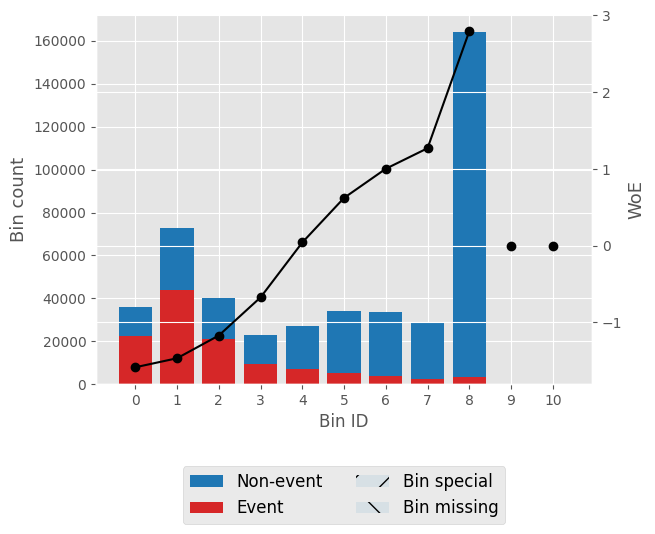

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  B_7_last





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.03)  117402   0.255826     114983    2419    0.020604   
1       [0.03, 0.03)   24110   0.052537      23539     571    0.023683   
2       [0.03, 0.04)   24158   0.052642      23232     926    0.038331   
3       [0.04, 0.07)   44818   0.097661      41203    3615    0.080660   
4       [0.07, 0.09)   26697   0.058174      22469    4228    0.158370   
5       [0.09, 0.13)   27175   0.059216      20536    6639    0.244305   
6       [0.13, 0.21)   41040   0.089429      27018   14022    0.341667   
7       [0.21, 0.26)   23458   0.051116      13322   10136    0.432091   
8       [0.26, 0.35)   29756   0.064840      15205   14551    0.489011   
9       [0.35, 0.47)   33141   0.072216      14898   18243    0.550466   
10      [0.47, 0.70)   42443   0.092486      16333   26110    0.615178   
11       [0.70, inf)   24715   0.053856       7347   17368    0.702731   
12           Special       0   0.000000          0       0    0.000000   
13           Missing       0   0.000000          0       0    0.000000   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0       2.809912  0.892831  0.085152  
1       2.667506  0.171813  0.016760  
2       2.170893  0.131381  0.013807  
3       1.381901  0.125384  0.014534  
4       0.618889  0.018869  0.002322  
5         0.0777  0.000351  0.000044  
6      -0.395643  0.015255  0.001895  
7      -0.778195  0.035896  0.004377  
8      -1.007554  0.078332  0.009397  
9      -1.254073  0.137594  0.016154  
10     -1.520649  0.261100  0.029817  
11     -1.911856  0.238136  0.025928  
12           0.0  0.000000  0.000000  
13           0.0  0.000000  0.000000  
Totals            2.106943  0.220186

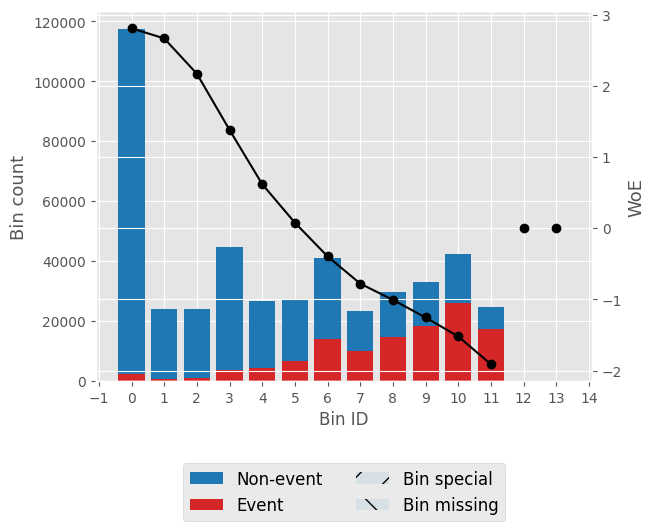

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  D_61_last





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.06)   68304   0.148839      67029    1275    0.018667   
1       [0.06, 0.10)   35429   0.077202      34508     921    0.025996   
2       [0.10, 0.15)   24375   0.053115      23409     966    0.039631   
3       [0.15, 0.27)   40779   0.088860      37483    3296    0.080826   
4       [0.27, 0.43)   39284   0.085602      32617    6667    0.169713   
5       [0.43, 0.61)   40141   0.087470      29167   10974    0.273386   
6       [0.61, 0.75)   38551   0.084005      24037   14514    0.376488   
7       [0.75, 0.85)   37678   0.082103      19511   18167    0.482165   
8       [0.85, 0.90)   35951   0.078339      14265   21686    0.603210   
9       [0.90, 0.93)   26999   0.058833       8232   18767    0.695100   
10       [0.93, inf)   23074   0.050280       5291   17783    0.770694   
11           Special       0   0.000000          0       0    0.000000   
12           Missing   48348   0.105353      44536    3812    0.078845   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0       2.910661  0.542445  0.050903  
1       2.571968  0.241040  0.023866  
2       2.136193  0.129674  0.013694  
3       1.379659  0.113793  0.013193  
4       0.536145  0.021340  0.002636  
5      -0.074009  0.000488  0.000061  
6      -0.547038  0.028153  0.003476  
7      -0.980147  0.093618  0.011255  
8      -1.470376  0.206667  0.023732  
9       -1.87559  0.250820  0.027439  
10     -2.263754  0.303559  0.031478  
11           0.0  0.000000  0.000000  
12      1.406625  0.139081  0.016080  
Totals            2.070676  0.217813

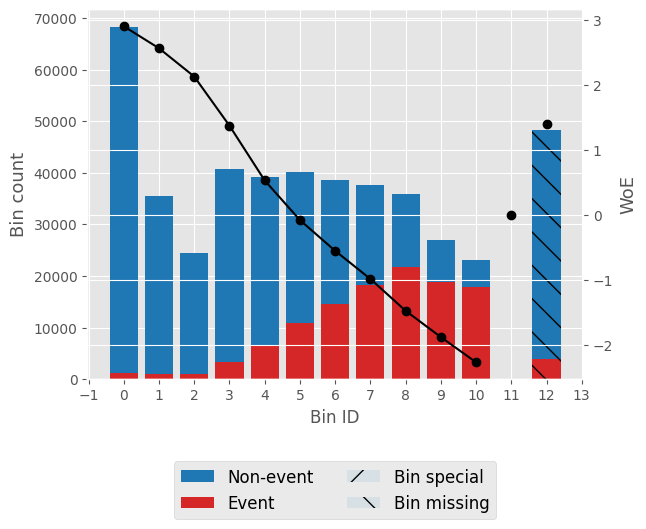

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  D_61_avg





c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Bin   Count  Count (%)  Non-event   Event  Event rate  \
0       (-inf, 0.06)   61688   0.134422      60908     780    0.012644   
1       [0.06, 0.09)   34045   0.074186      33439     606    0.017800   
2       [0.09, 0.15)   41020   0.089385      39735    1285    0.031326   
3       [0.15, 0.20)   24847   0.054143      23453    1394    0.056103   
4       [0.20, 0.27)   23855   0.051982      21654    2201    0.092266   
5       [0.27, 0.39)   39377   0.085805      32290    7087    0.179978   
6       [0.39, 0.49)   28875   0.062920      21147    7728    0.267636   
7       [0.49, 0.61)   38939   0.084851      24621   14318    0.367703   
8       [0.61, 0.69)   25141   0.054784      13931   11210    0.445885   
9       [0.69, 0.75)   23030   0.050184      11536   11494    0.499088   
10      [0.75, 0.83)   35479   0.077311      16245   19234    0.542124   
11      [0.83, 0.87)   23767   0.051790       9469   14298    0.601590   
12       [0.87, inf)   37767   0.082297      12344   25423    0.673154   
13           Special       0   0.000000          0       0    0.000000   
14           Missing   21083   0.045941      19313    1770    0.083954   
Totals                458913   1.000000     340085  118828    0.258934   

             WoE        IV        JS  
0       3.306307  0.570445  0.050152  
1        2.95908  0.275862  0.025684  
2       2.379955  0.252334  0.025723  
3       1.771303  0.101373  0.011238  
4        1.23476  0.055749  0.006557  
5       0.464977  0.016416  0.002034  
6      -0.044871  0.000128  0.000016  
7      -0.509436  0.024502  0.003030  
8      -0.834208  0.044526  0.005410  
9      -1.047871  0.065814  0.007870  
10     -1.220413  0.139245  0.016400  
11     -1.463615  0.135358  0.015555  
12     -1.774003  0.315153  0.034925  
13           0.0  0.000000  0.000000  
14       1.33828  0.056065  0.006528  
Totals            2.052971  0.211122

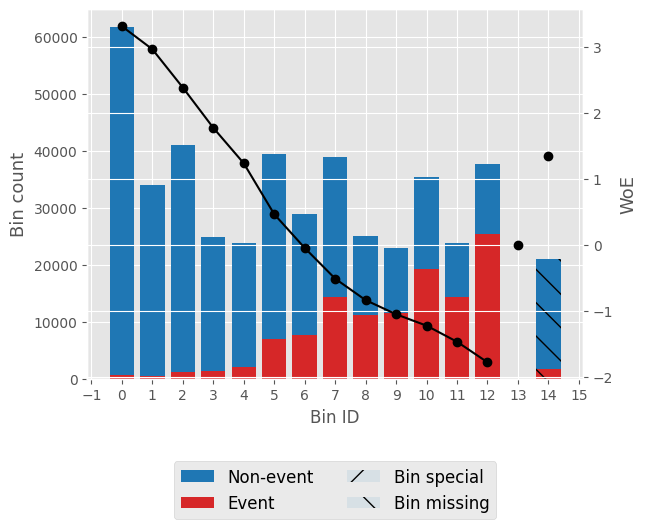

None

In [25]:
# WOE plots for top 10 features
top10_features = iv_score_df[:10].index.values

for col in top10_features:
    print("-"*100)
    print("="*100)
    print("################ Feature Name : ", col)
    print("\n\n")

    if col in cat_features:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(df_train[col], df_train['target'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(df_train[col], df_train['target'])

    binning_table = optb.binning_table
    display(binning_table.build())
    display(binning_table.plot(metric="woe"))

selecting features IV values > 0.5

In [26]:
selected_features = iv_score_df[iv_score_df > 0.5].index.values
cat_cols = [col for col in cat_features if col in selected_features]
train_cols = [col for col in df_train.columns if col in selected_features]

In [29]:
len(train_cols), len(cat_cols)

(195, 2)

In [30]:
cat_cols

['B_30_last', 'B_38_last']

In [32]:
top_cols

['P_2_last',
 'P_2_min',
 'P_2_avg',
 'P_2_max',
 'D_48_last',
 'D_48_avg',
 'B_18_last',
 'B_7_last',
 'D_61_last',
 'D_61_avg',
 'D_48_max',
 'B_10_last',
 'B_18_avg',
 'B_9_last',
 'B_7_avg',
 'B_2_avg',
 'B_2_last',
 'B_6_last',
 'D_44_last',
 'D_61_max']

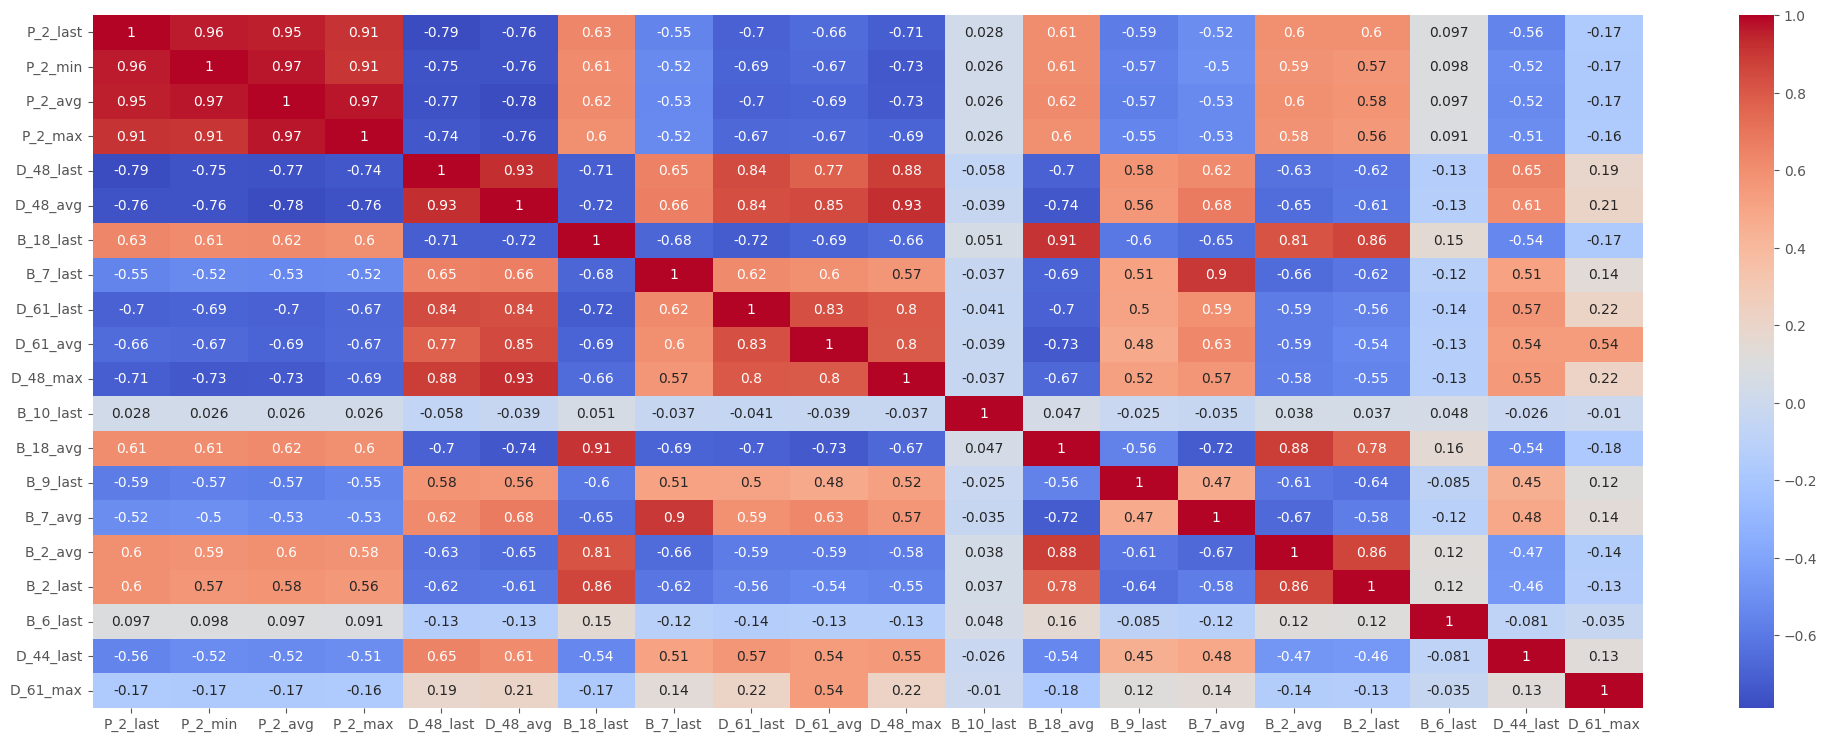

In [31]:
top_cols = [col for col in selected_features[:20] if col in train_cols]
corr_df = df_train[top_cols].corr()
plt.figure(figsize=(25, 9))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.show()

### Drop correlated

In [33]:
def drop_feature_selection(row, col, corr, row_iv, col_iv):
    if row_iv >= col_iv:
        return col
    else:
        return row

In [34]:
cor_matrix = df_train[train_cols].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
corr_df = upper_tri.stack().reset_index()
corr_df.columns = ['row', 'col', 'corr']
corr_df = corr_df.drop_duplicates()
corr_df = corr_df.sort_values('corr', ascending=False)
corr_df = corr_df.query("corr >= 0.8")
corr_df['row_iv'] = corr_df['row'].map(iv_score_dict)
corr_df['col_iv'] = corr_df['col'].map(iv_score_dict)

corr_df['drop_feature'] = corr_df.apply(lambda x: drop_feature_selection(x['row'], x['col'], x['corr'], x['row_iv'], x['col_iv']), axis=1)

In [35]:
corr_df

row        col      corr    row_iv    col_iv drop_feature
913    D_45_min  D_45_last  0.998801  0.632026  0.602134    D_45_last
7030   D_45_max   D_45_avg  0.992794  0.714567  0.704328     D_45_avg
6562   D_42_max   D_42_avg  0.990747  0.757351  0.761103     D_42_max
856    D_45_min   D_45_avg  0.988324  0.632026  0.704328     D_45_min
13615  D_45_avg  D_45_last  0.986283  0.704328  0.602134    D_45_last
...         ...        ...       ...       ...       ...          ...
12318   R_5_max  D_53_last  0.802042  0.840733  0.942450      R_5_max
11166  B_18_max   B_20_max  0.801578  1.037795  1.298860     B_18_max
9856    B_3_max  B_19_last  0.801011  1.697338  1.181275    B_19_last
11208  B_18_max    B_2_avg  0.800924  1.037795  1.947905     B_18_max
9378   S_23_max   S_23_avg  0.800192  0.917307  0.998425     S_23_max

[205 rows x 6 columns]

In [36]:
corr_drop_features = corr_df['drop_feature'].unique().tolist()

In [37]:
len(corr_drop_features)

113

### Fit model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# train valid split
train_data, valid_data = train_test_split(df_train, test_size=0.3, random_state=42, shuffle=True, stratify=df_train['target'])

train_data.shape, valid_data.shape

((321239, 617), (137674, 617))

In [42]:
selected_features = [col for col in selected_features if col not in corr_drop_features]
cat_cols = [col for col in cat_cols if col in selected_features]
train_cols = [col for col in df_train.columns if col in selected_features]

In [43]:
len(selected_features), len(cat_cols), len(train_cols)

(82, 2, 82)

In [44]:
X_train = train_data[train_cols].copy()
y_train = train_data['target'].copy()

X_valid = valid_data[train_cols].copy()
y_valid = valid_data['target'].copy()

X_test = df_test[train_cols].copy()

In [45]:
# binning process

# selection_criteria = {
#     "iv": {"min": 0.02, "max": 1},
#     "quality_score": {"min": 0.01}
# }

binning_process = optbinning.BinningProcess(                             
    variable_names=train_cols,
    #selection_criteria=selection_criteria,
    categorical_variables=cat_cols
)

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
estimator = LogisticRegression() # lr estimator

In [50]:
# scorecard
scorecard = optbinning.Scorecard(
    binning_process=binning_process,
    estimator=estimator, 
    scaling_method="min_max",
    scaling_method_params={"min": 300, "max": 850},
    # scaling_method = "pdo_odds",
    # scaling_method_params = {"pdo": 20, "odds": 50, "scorecard_points": 100},
    #intercept_based=True,
    #reverse_scorecard=True
)

In [51]:
# model fitting
scorecard.fit(X_train, y_train)

c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\oobur\Projects\spbu_master\sem4\vkr\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: F

Scorecard(binning_process=BinningProcess(categorical_variables=['B_30_last',
                                                                'B_38_last'],
                                         variable_names=['P_3_min', 'D_46_min',
                                                         'D_47_min', 'D_52_min',
                                                         'D_112_min',
                                                         'S_25_min', 'B_6_min',
                                                         'B_8_min', 'B_10_min',
                                                         'B_40_min', 'R_27_min',
                                                         'D_39_max', 'D_45_max',
                                                         'D_61_max', 'D_65_max',
                                                         'D_78_max', 'S_15_max',
                                                         'S_22_max', 'B_9_max',
                                                         'B_17_max', 'B_26_max',
                                                         'R_2_max', 'R_6_max',
                                                         'P_3_avg', 'D_42_avg',
                                                         'D_43_avg', 'D_46_avg',
                                                         'D_51_avg', 'D_62_avg',
                                                         'D_65_avg', ...]),
          estimator=LogisticRegression(), scaling_method='min_max',
          scaling_method_params={'max': 850, 'min': 300})

In [52]:
# scorecard table
scorecard_df = scorecard.table(style="detailed")

In [53]:
scorecard_df.head()

Variable  Bin id           Bin  Count  Count (%)  Non-event  Event  \
0  P_3_min       0  (-inf, 0.06)  23244   0.072357       7927  15317   
1  P_3_min       1  [0.06, 0.19)  16122   0.050187       6681   9441   
2  P_3_min       2  [0.19, 0.28)  17612   0.054825       9193   8419   
3  P_3_min       3  [0.28, 0.33)  17617   0.054841      10876   6741   
4  P_3_min       4  [0.33, 0.41)  31207   0.097146      21914   9293   

   Event rate       WoE        IV        JS  Coefficient    Points  
0    0.658966 -1.710200  0.257974  0.028815    -0.029353  6.466734  
1    0.585597 -1.397306  0.119381  0.013816    -0.029353  6.631119  
2    0.478026 -0.963560  0.060317  0.007261    -0.029353  6.858996  
3    0.382642 -0.573161  0.020264  0.002499    -0.029353  7.064100  
4    0.297786 -0.193647  0.003809  0.000475    -0.029353  7.263485

In [54]:
scorecard_df.shape

(861, 13)

In [55]:
# will try to understand scorecard for one feature

scorecard_df.query("Variable == 'P_2_last'")

Variable  Bin id           Bin  Count  Count (%)  Non-event  Event  \
0   P_2_last       0  (-inf, 0.18)  20871   0.064970       1836  19035   
1   P_2_last       1  [0.18, 0.32)  23813   0.074129       5929  17884   
2   P_2_last       2  [0.32, 0.43)  28859   0.089837      11247  17612   
3   P_2_last       3  [0.43, 0.52)  28380   0.088345      15475  12905   
4   P_2_last       4  [0.52, 0.58)  20879   0.064995      14387   6492   
5   P_2_last       5  [0.58, 0.64)  22007   0.068507      17762   4245   
6   P_2_last       6  [0.64, 0.72)  28542   0.088850      25875   2667   
7   P_2_last       7  [0.72, 0.79)  29197   0.090889      28128   1069   
8   P_2_last       8  [0.79, 0.83)  21209   0.066022      20817    392   
9   P_2_last       9  [0.83, 0.88)  27351   0.085142      27108    243   
10  P_2_last      10  [0.88, 0.92)  21473   0.066844      21330    143   
11  P_2_last      11  [0.92, 0.97)  29131   0.090683      29012    119   
12  P_2_last      12   [0.97, inf)  17450   0.054321      17406     44   
13  P_2_last      13       Special      0   0.000000          0      0   
14  P_2_last      14       Missing   2077   0.006466       1747    330   

    Event rate       WoE        IV        JS  Coefficient     Points  
0     0.912031 -3.390202  0.749671  0.064989    -0.326622 -12.454169  
1     0.751018 -2.155563  0.409768  0.043156    -0.326622  -5.236370  
2     0.610278 -1.499991  0.246732  0.028241    -0.326622  -1.403844  
3     0.454722 -0.869901  0.078413  0.009504    -0.326622   2.279713  
4     0.310934 -0.255757  0.004505  0.000562    -0.326622   5.870044  
5     0.192893  0.379808  0.008955  0.001113    -0.326622   9.585609  
6     0.093441  1.220811  0.093549  0.011018    -0.326622  14.502183  
7     0.036613  2.218530  0.233620  0.024384    -0.326622  20.334928  
8     0.018483  2.920752  0.241640  0.022638    -0.326622  24.440171  
9     0.008885  3.663011  0.406409  0.033647    -0.326622  28.779479  
10    0.006660  3.953514  0.347437  0.027383    -0.326622  30.477779  
11    0.004085  4.444830  0.535328  0.038833    -0.326622  33.350053  
12    0.002521  4.928869  0.357774  0.023954    -0.326622  36.179786  
13    0.000000  0.000000  0.000000  0.000000    -0.326622   7.365222  
14    0.158883  0.615051  0.002073  0.000255    -0.326622   7.365222

Вот тут это нужно поменять  

we can observe that P_2 feature Points (score).  
while increasing bins the score also increasing  
for example if the user P_2 value is 0.73 then that user belongs to 7th bin corresponding score is 22.45

### Results

In [66]:
train_data['predict_proba'] = scorecard.predict_proba(X_train)[:, 1]
valid_data['predict_proba'] = scorecard.predict_proba(X_valid)[:, 1]

train_score = get_amex_metric_calculated(train_data['target'].values, train_data['predict_proba'].values)
valid_score = get_amex_metric_calculated(valid_data['target'].values, valid_data['predict_proba'].values)

print("Train Score :", train_score)
print("Valid Score :", valid_score)

Train Score : 0.7575423125893459
Valid Score : 0.7614837959444472


In [68]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_data['predict_proba'])
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)
optimal_threshold = thresholds[optimal_idx]
auc_score = metrics.auc(false_positive_rate, true_positive_rate)
print("Train Threshold value is:", optimal_threshold)

false_positive_rate1, true_positive_rate1, thresholds = metrics.roc_curve(y_valid, valid_data['predict_proba'])
optimal_idx = np.argmax(true_positive_rate1 - false_positive_rate1)
optimal_threshold1 = thresholds[optimal_idx]
auc_score1 = metrics.auc(false_positive_rate1, true_positive_rate1)
print("Valid Threshold value is:", optimal_threshold1)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Binning+LR: Train AUC = {0:.4f}'.format(auc_score))
plt.plot(false_positive_rate1, true_positive_rate1, 'r', label='Binning+LR: Valid AUC = {0:.4f}'.format(auc_score1))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'metrics' is not defined

In [ ]:
train_data['predict'] = (train_data['predict_proba'] > optimal_threshold).astype(int)
valid_data['predict'] = (valid_data['predict_proba'] > optimal_threshold).astype(int)   

In [ ]:
conf_mat = metrics.confusion_matrix(train_data['target'], train_data['predict'])
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax1)
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', ax=ax2)
plt.show()

In [ ]:
conf_mat = metrics.confusion_matrix(valid_data['target'], valid_data['predict'])
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax1)
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', ax=ax2)
plt.show()

In [ ]:
print(metrics.classification_report(train_data['target'], train_data['predict'], labels=[0, 1]))

In [ ]:
print(metrics.classification_report(valid_data['target'], valid_data['predict'], labels=[0, 1]))

### Submission

In [ ]:
test_df['prediction'] = scorecard.predict_proba(X_test)[:, 1]
sub_df = test_df[['customer_ID', 'prediction']].copy()
sub_df.to_csv("submission.csv", index=False)